In [1]:
pip install numpy 

     |████████████████████████████████| 15.7 MB 4.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

     |████████████████████████████████| 11.2 MB 5.0 MB/s            
     |████████████████████████████████| 1.1 MB 59.8 MB/s            
     |████████████████████████████████| 4.3 MB 44.0 MB/s            
     |████████████████████████████████| 895 kB 68.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#3
#Metodo Runge Kutta
k = 389.6
A = 0.01
l = 0.30
R = 8.314
c_v = 3/2*R
n = 1

C = (k*A)/(c_v*l)

def dT1(T_1,T_2):
    return -C*(T_1-T_2)

def dT2(T_1,T_2):
    return C*(T_1-T_2)

#discretización
N = 100
t = np.linspace(0.,30.,N)
cond_iniciales = [400, 200]


In [7]:

def GetRungeKutta(dT1,dT2,T0,t):
    
    k = 389.6
    A = 0.01
    l = 0.30
    c_v = 3/2*R
    n = 1
    h = (t[-1]-t[0])/(len(t))

    T_1 = np.zeros(len(t))
    T_2 = np.zeros(len(t))

    T_1[0] = T0[0]
    T_2[0] = T0[1]

    for i in range(1,len(t)):
        
        k11 = dT1(T_1[i-1], T_2[i-1])
        k21 = dT2(T_1[i-1], T_2[i-1])

        k12 = dT1(T_1[i-1] + k11*h, T_2[i-1] +k21*h)
        k22 = dT2(T_1[i-1] + k11*h, T_2[i-1] +k21*h)


        T_1[i] = T_1[i-1] + (h/2)*(k11+k12)
        T_2[i] = T_2[i-1] + (h/2)*(k21+ k22)

    return T_1, T_2

solucion = GetRungeKutta(dT1,dT2,cond_iniciales,t)

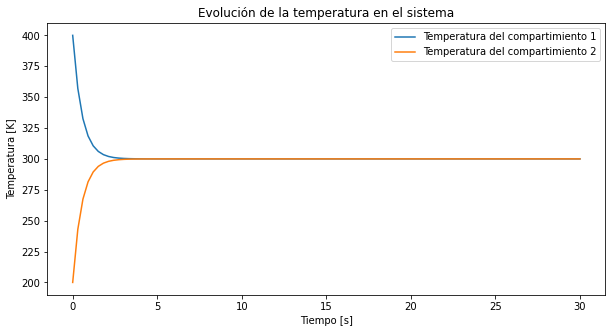

In [8]:
temp1=solucion[0]
temp2=solucion[1]
fig = plt.figure(figsize=(10,5))
plt.title("Evolución de la temperatura en el sistema")
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [K]")
plt.plot(t,temp1, label = "Temperatura del compartimiento 1")
plt.plot(t, temp2, label = "Temperatura del compartimiento 2")
plt.legend()



# e) ¿Cuál es el límite termodinámico de ambas variables: limt→∞ T1(t) y limt→∞ T2(t)?
A partir de esto, se puede observar que el limite termodinámico de la temperatura 1 y la temperatura 2 es la misma,
las cuales coinciden con el valor de 300K, lo cual es lo que se espera, pues los dos compartimientos al intercambiar calor entre sí van a llegar al punto donde sus temperaturas son iguales.